# Checking heritability computed on DNAm

In [23]:
library(here)
library(data.table)
library(parallel)

In [2]:
h_files < -dir(here("data", "gcta_analysis", "delahaye_output"))
cpgs < -gsub(".hsq", "", h_files)

In [25]:
read_heritability <- function(fname){
    dt <- fread(fname,fill=TRUE)
    main_cols <- transpose(dt[1:8,c(2)])
    colnames(main_cols) <- dt$Source[1:8]
    se_cols <- transpose(dt[1:4,c(3)])
    colnames(se_cols) <- paste0(dt$Source[1:4],"_SE")
    return(cbind(data.table(probe=gsub(".*/(.*).hsq","\\1",fname)),main_cols,se_cols))
}
current_heritability <- rbindlist(
    mclapply(
        here("data","gcta_analysis","delahaye_output",h_files),
        read_heritability,
        mc.cores = 16
    )
)

In [26]:
head(current_heritability)

probe,V(G),V(e),Vp,V(G)/Vp,logL,logL0,LRT,Pval,V(G)_SE,V(e)_SE,Vp_SE,V(G)/Vp_SE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg00000029,0.014699,0.176618,0.191317,0.076832,41.664,37.479,8.370,1.91e-03,0.010041,0.016250,0.017702,0.049899
cg00000108,0.336076,0.072536,0.408613,0.822481,90.523,-21.504,224.053,0.00e+00,0.069762,0.007647,0.069107,0.035863
cg00000109,0.000000,0.080807,0.080807,0.000001,148.617,148.617,0.000,5.00e-01,0.001653,0.007277,0.007129,0.020453
cg00000165,0.001287,0.106842,0.108129,0.011907,111.422,111.331,0.183,3.34e-01,0.003213,0.009780,0.009558,0.029633
cg00000236,0.001661,0.059108,0.060769,0.027332,186.183,185.565,1.236,1.33e-01,0.002108,0.005383,0.005415,0.034262
cg00000289,0.050336,0.071638,0.121974,0.412679,129.968,105.339,49.257,1.12e-12,0.015407,0.007401,0.015317,0.084071


[1] 164143

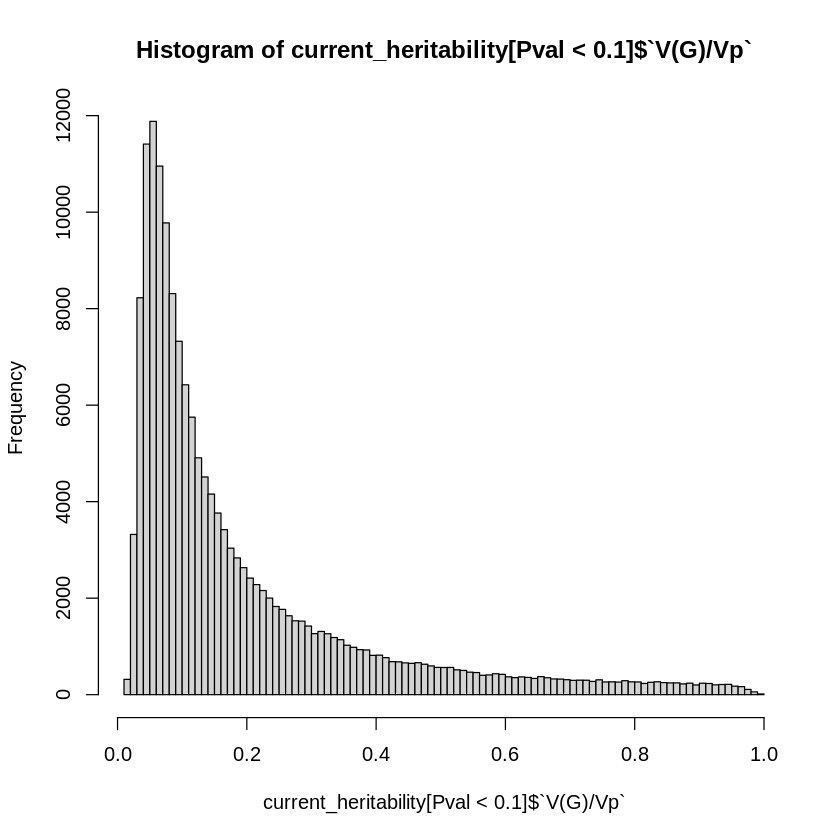

In [28]:
nrow(current_heritability[Pval < 0.10])
hist(current_heritability[Pval < 0.10]$`V(G)/Vp`,breaks=100)